# Setup

In [1]:
import glob
import numpy as np
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from random import randint
import cv2

In [115]:
import math

# Create Black and Draw White

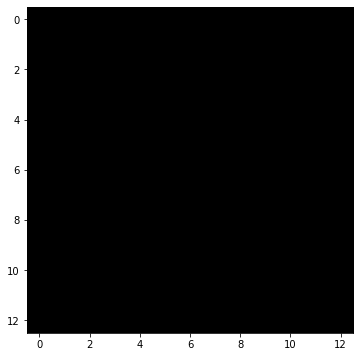

In [2]:
black_img = np.zeros((13, 13))
plt.figure(figsize = (10, 6))
plt.imshow(black_img, cmap="gray")
plt.show()

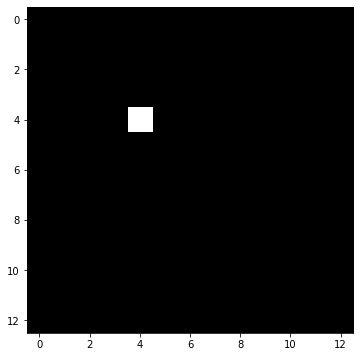

In [8]:
dummy = black_img.copy()
dummy[4,4] = 1
plt.figure(figsize = (10, 6))
plt.imshow(dummy, cmap="gray")
plt.show()

Area: 9.0


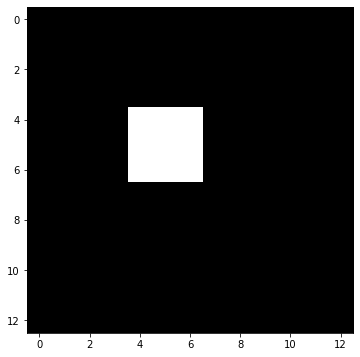

In [12]:
starting = [4, 4]
filter_size = 3

dummy = black_img.copy()

for i in range(filter_size):
    for j in range(filter_size):
        dummy[starting[0]+i, starting[1]+j] = 1
        
print("Area:", np.sum(dummy))        
plt.figure(figsize = (10, 6))
plt.imshow(dummy, cmap="gray")
plt.show()

In [15]:
def fixel_to_filter(img, center_point = [5, 5], filter_size = 3):
    starting = [center_point[0] - 0.5*(filter_size-1), center_point[1] - 0.5*(filter_size-1)]
    
    dummy = img.copy()

    for i in range(filter_size):
        for j in range(filter_size):
            dummy[int(starting[0])+i, int(starting[1])+j] = 1
    return dummy

Area: 49.0


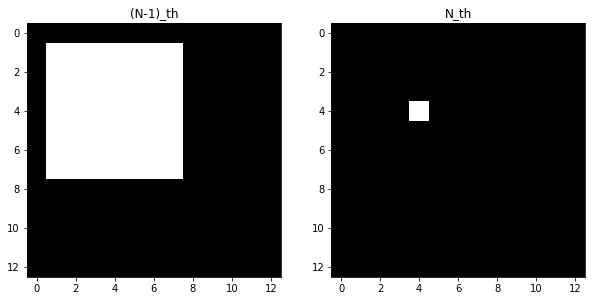

In [23]:
center_point = [4, 4]
filter_size = 7

img = black_img.copy()

fea_map = img.copy()
fea_map[center_point[0], center_point[1]] = 1
output = fixel_to_filter(img, center_point, filter_size)
        
print("Area:", np.sum(output))        
plt.figure(figsize = (10, 6))
plt.subplot(121), plt.imshow(output, cmap="gray"), plt.title("(N-1)_th")
plt.subplot(122), plt.imshow(fea_map, cmap = "gray"), plt.title("N_th")
plt.show()

Area: 50.0


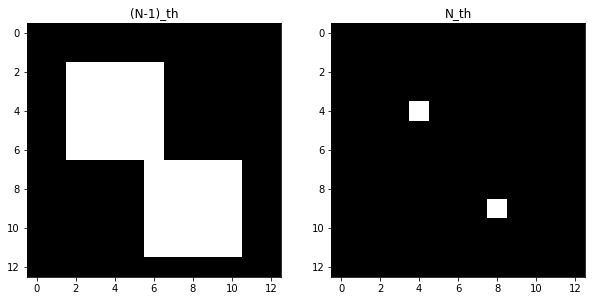

In [26]:
center_points = [[4, 4], [9, 8]]
filter_size = 5

img = black_img.copy()
fea_map = img.copy()
output = img.copy()

for center_point in center_points:
    fea_map[center_point[0], center_point[1]] = 1
    output = fixel_to_filter(output, center_point, filter_size)
        
print("Area:", np.sum(output))        
plt.figure(figsize = (10, 6))
plt.subplot(121), plt.imshow(output, cmap="gray"), plt.title("(N-1)_th")
plt.subplot(122), plt.imshow(fea_map, cmap = "gray"), plt.title("N_th")
plt.show()

In [27]:
def get_center_list(img):
    return np.argwhere(img > 0)

In [28]:
center_list = get_center_list(fea_map)
print(center_list)

[[4 4]
 [9 8]]


# How 1 Pixel in N_th Feature Map Represents Input (Stride = 1)

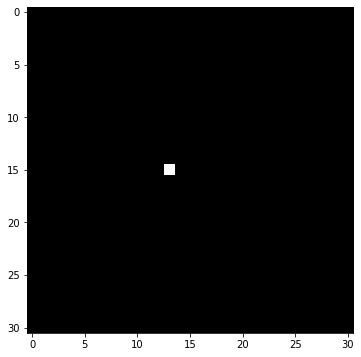

In [54]:
black_img = np.zeros((31, 31))
dummy = black_img.copy()
dummy[15, 13] = 1
plt.figure(figsize = (10, 6))
plt.imshow(dummy, cmap="gray")
plt.show()

Area in Layer 2: 9.0 (appiled 3x3)


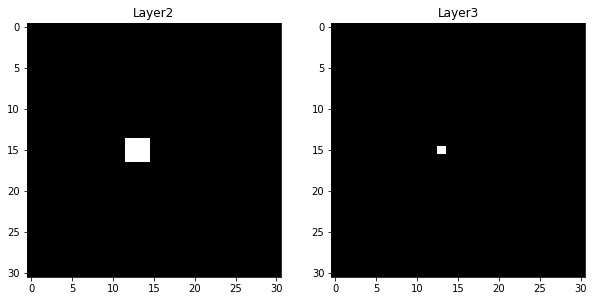

Area in Layer 1: 25.0 (appiled 3x3)


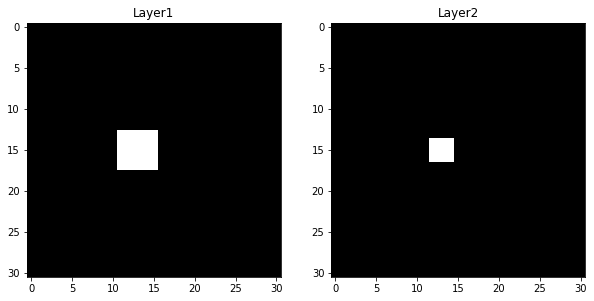

Area in Layer 0: 81.0 (appiled 5x5)


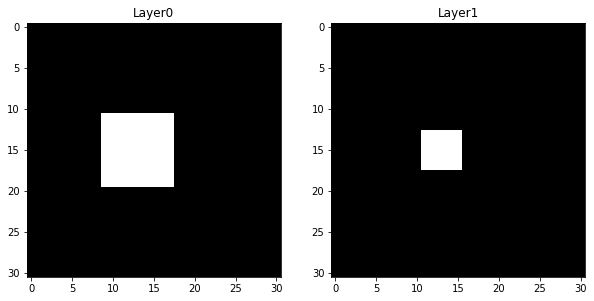

In [68]:
network = [5, 3, 3]

reversed_net = network[::-1]
layers = reversed_net
fea_map = dummy.copy()
temp = fea_map

for i in range(len(layers)):
    current_feature = temp
    center_points = get_center_list(temp)

    represented = black_img.copy()

    for center_point in center_points:
        represented = fixel_to_filter(represented, center_point, filter_size = layers[i])
   
    temp = represented

    print(f"Area in Layer {len(layers)-i-1}:", np.sum(represented), f"(appiled {layers[i]}x{layers[i]})")
    plt.figure(figsize = (10, 6))
    plt.subplot(121), plt.imshow(represented, cmap="gray"), plt.title(f"Layer{len(layers)-i-1}")
    plt.subplot(122), plt.imshow(current_feature, cmap = "gray"), plt.title(f"Layer{len(layers)-i}")
    plt.show()

# How 1 Pixel in N_th Feature Map Represents Input (Stride = n)

In [139]:
def fixel_to_filter(img, center_point = [5, 5], filter_size = 3):
    starting = [center_point[0] - 0.5*(filter_size-1), center_point[1] - 0.5*(filter_size-1)]
    
    dummy = img.copy()

    for i in range(filter_size):
        for j in range(filter_size):
            dummy[int(starting[0])+i, int(starting[1])+j] = 1
    return dummy

In [71]:
def get_center_list(img):
    return np.argwhere(img > 0)

Area: 9.0


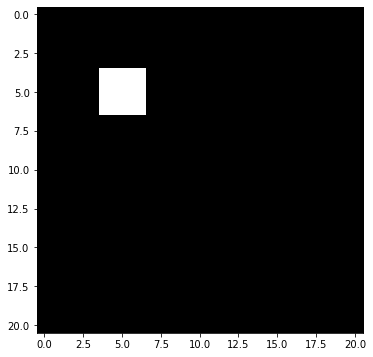

In [110]:
black_img = np.zeros((21, 21))

starting = [4, 4]
filter_size = 3

dummy = black_img.copy()

for i in range(filter_size):
    for j in range(filter_size):
        dummy[starting[0]+i, starting[1]+j] = 1
        
print("Area:", np.sum(dummy))        
plt.figure(figsize = (10, 6))
plt.imshow(dummy, cmap="gray")
plt.show()

In [122]:
center_lists = get_center_list(dummy)
print(center_lists)

[[4 4]
 [4 5]
 [4 6]
 [5 4]
 [5 5]
 [5 6]
 [6 4]
 [6 5]
 [6 6]]


In [130]:
stride=2
one_side = np.sqrt(len(center_lists))

new_list = []

index=0
for i in range(int(one_side)):
    for j in range(int(one_side)):
        print(index, i, j, [center_lists[0][0]+i*stride, center_lists[0][1]+j*stride])
        index+=1

0 0 0 [4, 4]
1 0 1 [4, 6]
2 0 2 [4, 8]
3 1 0 [6, 4]
4 1 1 [6, 6]
5 1 2 [6, 8]
6 2 0 [8, 4]
7 2 1 [8, 6]
8 2 2 [8, 8]


In [141]:
def center_with_stride(center_lists, stride=2):
    one_side = np.sqrt(len(center_lists))

    new_list = []

    index=0
    for i in range(int(one_side)):
        for j in range(int(one_side)):
            new_list.append([center_lists[0][0]+i*stride, center_lists[0][1]+j*stride])
            index+=1
    return new_list

In [142]:
new_list = center_with_stride(center_lists, stride=2)
print(new_list)

[[4, 4], [4, 6], [4, 8], [6, 4], [6, 6], [6, 8], [8, 4], [8, 6], [8, 8]]


Area: 49.0


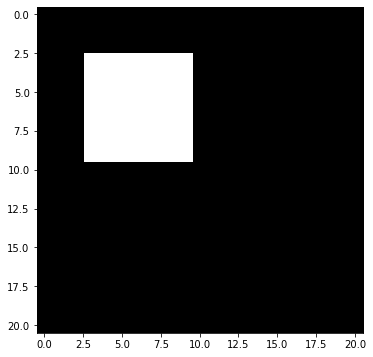

In [143]:
represented = black_img.copy()

new_list = center_with_stride(center_lists, stride=2)
for center_point in new_list:
    
    represented = fixel_to_filter(represented, center_point)

print("Area:", np.sum(represented))        
plt.figure(figsize = (10, 6))
plt.imshow(represented, cmap="gray")
plt.show()

In [149]:
black_img = np.zeros((51, 51))
dummy = black_img.copy()
dummy[15, 13] = 1

# 1st Layer -> n-th Layer
network = [5, 3, 3, 3]
strides = [2, 1, 1, 1]

Area in Layer 3: 9.0 (appiled 3x3)


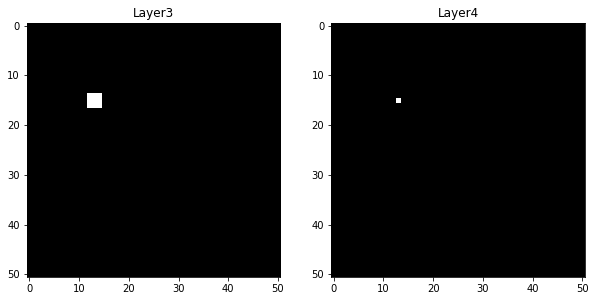

Area in Layer 2: 25.0 (appiled 3x3)


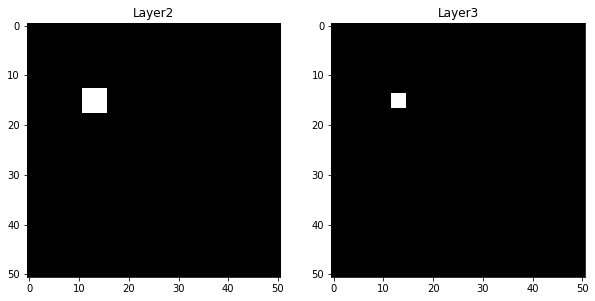

Area in Layer 1: 49.0 (appiled 3x3)


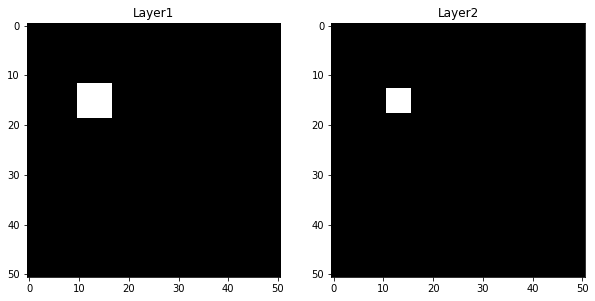

Area in Layer 0: 289.0 (appiled 5x5)


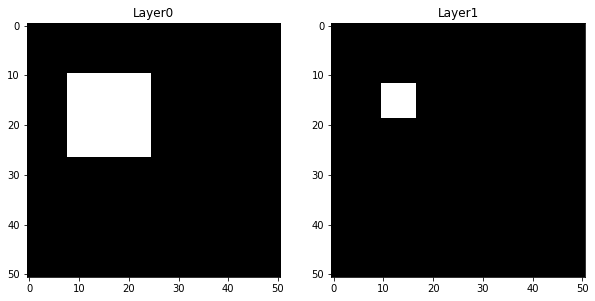

In [157]:
layers = network[::-1]
strid_ = strides[::-1]

fea_map = dummy.copy()
temp = fea_map

for i in range(len(layers)):
    current_feature = temp
    represented = black_img.copy()
    
    stride = strid_[i]
    
    if stride == 1: center_points = get_center_list(temp)
    else: 
        center_lists = get_center_list(temp)
        center_points = center_with_stride(center_lists, stride=stride)

    for center_point in center_points:
        represented = fixel_to_filter(represented, center_point, filter_size = layers[i])
   
    temp = represented

    print(f"Area in Layer {len(layers)-i-1}:", np.sum(represented), f"(appiled {layers[i]}x{layers[i]})")
    plt.figure(figsize = (10, 6))
    plt.subplot(121), plt.imshow(represented, cmap="gray"), plt.title(f"Layer{len(layers)-i-1}")
    plt.subplot(122), plt.imshow(current_feature, cmap = "gray"), plt.title(f"Layer{len(layers)-i}")
    plt.show()

In [158]:
# Confirm by Formula
last = 1

for i in range(len(layers)):
    pre_fm_size = (last-1)*strid_[i] + layers[i]
    last = pre_fm_size
    
print(last**2)

289
